In [1]:
'''
Clustering: K-Means 
Dataset: Cities_r2.csv
Apply Data pre-processing (Label Encoding , Data Transformation….) techniques if necessary. 
Apply K-Means clustering algorithms (based on effective_literacy_rate_total column) to find the group of customers. 
'''

'\nClustering: K-Means \nDataset: Cities_r2.csv\nApply Data pre-processing (Label Encoding , Data Transformation….) techniques if necessary. \nApply K-Means clustering algorithms (based on effective_literacy_rate_total column) to find the group of customers. \n'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score

In [3]:
data = pd.read_csv(r'LP-1_Dataset\K-Means & Hirarchical Clustering\cities_r2.csv')

data.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [4]:
data.columns

Index(['name_of_city', 'state_code', 'state_name', 'dist_code',
       'population_total', 'population_male', 'population_female',
       '0-6_population_total', '0-6_population_male', '0-6_population_female',
       'literates_total', 'literates_male', 'literates_female', 'sex_ratio',
       'child_sex_ratio', 'effective_literacy_rate_total',
       'effective_literacy_rate_male', 'effective_literacy_rate_female',
       'location', 'total_graduates', 'male_graduates', 'female_graduates'],
      dtype='object')

In [5]:
X = data[['effective_literacy_rate_total']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

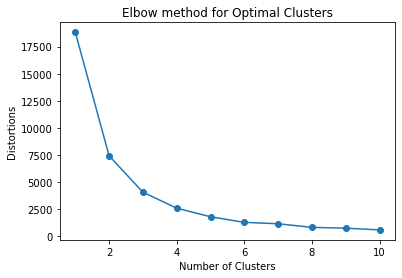

In [7]:
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortions')
plt.title('Elbow method for Optimal Clusters')
plt.show()

C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

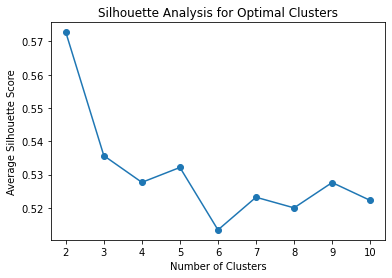

In [9]:
range_n_clusters = range(2, 11)
silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X_scaled)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis for Optimal Clusters')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=2, random_state=0)
data['Cluster'] = kmeans.fit_predict(X)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


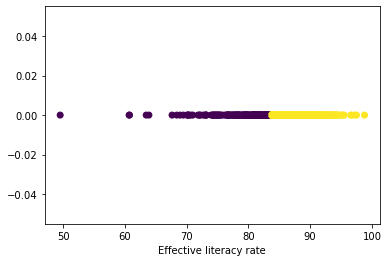

In [11]:
plt.scatter(data['effective_literacy_rate_total'], [0]*len(data), c=data['Cluster'], cmap='viridis')
plt.xlabel('Effective literacy rate')
plt.show()

In [13]:
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette Score: ", silhouette_avg)

Silhouette Score:  0.5727597472670408


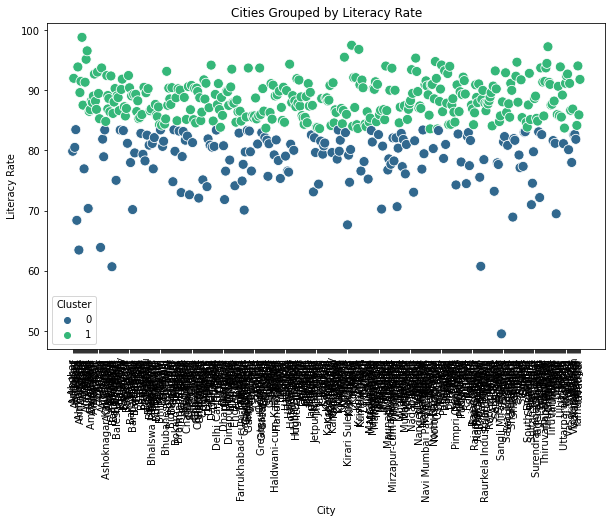

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['name_of_city'], y=data['effective_literacy_rate_total'], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Cities Grouped by Literacy Rate')
plt.xlabel('City')
plt.ylabel('Literacy Rate')
plt.xticks(rotation=90)
plt.show()

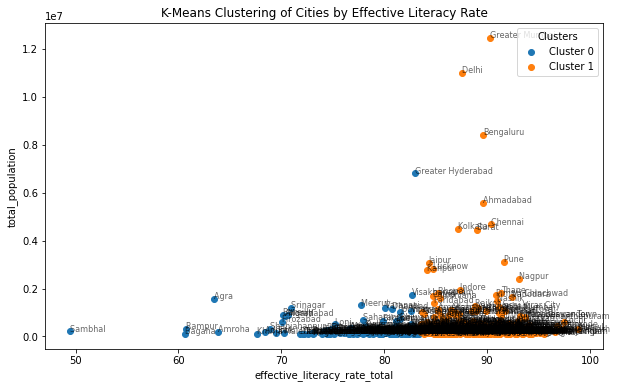

In [17]:
plt.figure(figsize=(10, 6))
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['effective_literacy_rate_total'],
               cluster_data['population_total'],
               label=f"Cluster {cluster}")

for i, city in enumerate(data['name_of_city']):
    plt.annotate(city, (data['effective_literacy_rate_total'][i], data['population_total'][i]), fontsize=8, alpha=0.6)

plt.xlabel('effective_literacy_rate_total')
plt.ylabel('total_population')
plt.legend(title='Clusters')
plt.title('K-Means Clustering of Cities by Effective Literacy Rate')
plt.show()